In [2]:
import numpy as np
import pandas as pd

import dask.dataframe as dd
import dask_ml.cluster

In [3]:
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('../data/processed_data_sample.csv')

In [5]:
ddf = dd.from_pandas(df, npartitions=16)

In [6]:
def get_clusters_on(ddf, columns, upper_n_clusters):

    data = ddf[columns].compute()
    for n_clusters in range(2, upper_n_clusters):
        kmeans = dask_ml.cluster.KMeans(n_clusters=n_clusters, random_state=0).fit(data)
        ddf['Clusters on {}: n = {}'.format(columns[1],
                                            n_clusters)] = dd.from_dask_array(kmeans.labels_)
    
    return ddf

In [7]:
def get_plot(sample, clustering_on):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

    x = sample[clustering_on[0]].compute()
    y = sample[clustering_on[1]].compute()

    for i, ax in enumerate(axes):
        ax.scatter(x, y, c=sample['Clusters on %s: n = %s' % (clustering_on[1], i + 2)].compute());

**Clustering**

In [60]:
clustering_on = ['SSeeror', 'Initial_C_rate',]

In [62]:
ddf = get_clusters_on(ddf, clustering_on, 5)

In [63]:
sample = ddf.sample(frac=0.01)

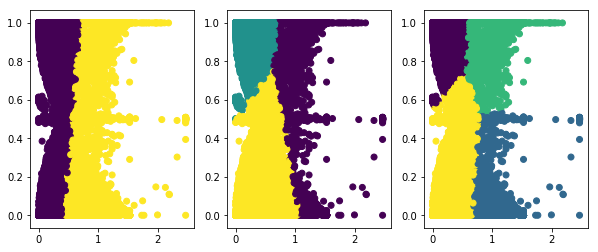

In [64]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

x = sample[clustering_on[0]].compute()
y = sample[clustering_on[1]].compute()

for i, ax in enumerate(axes):
    ax.scatter(x, y, c=sample['Clusters on %s: n = %s' % (clustering_on[1], i + 2)].compute());

In [71]:
clustering_on = ['DD_to_C_rate', 'SSeeror',]

In [72]:
ddf = get_clusters_on(ddf, clustering_on, 5)

In [73]:
sample = ddf.sample(frac=0.01)

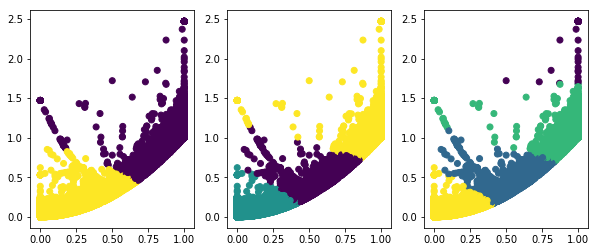

In [74]:
get_plot(sample, clustering_on)

In [1]:
clustering_on = ['Cooperation_rating', 'CC_to_C_rate',]

In [8]:
ddf = get_clusters_on(ddf, clustering_on, 5)

In [9]:
sample = ddf.sample(frac=0.01)

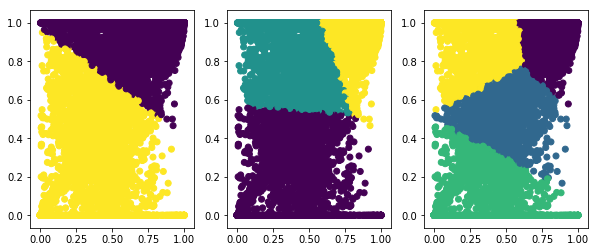

In [10]:
get_plot(sample, clustering_on)